In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()

In [5]:
# reflect an existing database into a new model

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

## GRADER PLEASE NOTE

* Some of the instructions are different from the original but still adhere to the rubric.
* The students get the average precipitation per day instead of every single precipitation value.

In [9]:
# Find the most recent date in the data set.

first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc01dbe5b80>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [10]:
year = []
month = []
day = []

#This for loop figures out the years in the data set
for row in session.query(Measurement.date).all():
    year.append(int(str(row)[2:6]))

#This figures out the most recent year.  Since "years" get higher and higher,
#the MAX function should be appropriate
max_year = max(year)

#In this loop, amongst all the rows that contain the "most recent year", 
#it extracts all the "month" values
for row in session.query(Measurement.date).all():
    if int(str(row)[2:6]) == max_year:
        month.append(int(str(row)[8:9]))

#since "months progress from 1 to 12, we apply the "Max" function tothe list
# of months to get the most recent month
max_month = max(month)

#Given the most recent year, and most recent month, this loop finds all the "days"
#in the dataset
for row in session.query(Measurement.date).all():
    if int(str(row)[8:9]) == max_month:
        day.append(int(str(row)[11:12]))

#since the "days" progress chronologically from 1 to 28 / 30 / 31, the "Max"
#function will find the most recent day
max_day = max(day)

# combine all 3 together and you get the most recent "Date"
print (f"Most Recent Date: {max_year}-{max_month}-{max_day}")

Most Recent Date: 2017-8-9


In [11]:
# Using this date, find the average precipitation per day
# for the preceding 12 months of data sorted by ascending date.

recent_date = str(max_year)+"-0"+str(max_month)+"-0"+str(max_day)

daily_precipitation = []
date = []

for row in session.query(Measurement.date, Measurement.prcp).all():
    date.append(str(row[0]))
    daily_precipitation.append(str(row[1]))

    
prcp_data = {'date': date, 'precipitation': daily_precipitation}
prcp_df = pd.DataFrame(data=prcp_data)
prcp_df

,date,precipitation
0,2010-01-01,0.08
1,2010-01-02,0.0
2,2010-01-03,0.0
3,2010-01-04,0.0
4,2010-01-06,None
...,...,...
19545,2017-08-19,0.09
19546,2017-08-20,None
19547,2017-08-21,0.56
19548,2017-08-22,0.5


In [12]:
# Convert your results into a pandas DataFrame with date as index.
#sorted_ascending_df = sorted_ascending_df.set_index('date')
sorted_ascending_df = prcp_df.sort_values(by='date', ascending=True)
sorted_ascending_df

,date,precipitation
0,2010-01-01,0.08
9007,2010-01-01,0.21
9518,2010-01-01,0.15
12187,2010-01-01,0.15
14959,2010-01-01,0.05
...,...,...
19548,2017-08-22,0.5
2723,2017-08-23,0.0
7634,2017-08-23,0.0
12186,2017-08-23,0.08


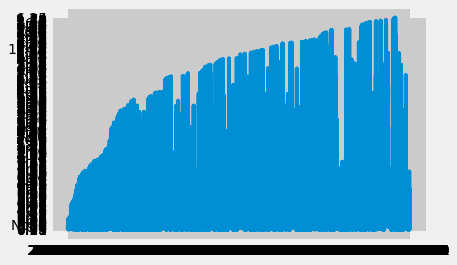

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
xpoints = sorted_ascending_df['date']
ypoints = sorted_ascending_df['precipitation']

plt.plot(xpoints, ypoints)
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data

# Exploratory Station Analysis

In [15]:
# Query total number of stations in dataset


In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [17]:
# Using the station id from the previous query, calculate the lowest, 
# highest, and average temperature recorded for this station.


In [18]:
# Query the last 12 months of temperature observation data for this station.
# Plot the results as a histogram with bins = 12.


# Close session